# Algorithmes de tri (solutions)

Il existe un grand nombre d'algorithmes de tri, nous allons en voir deux et en comparer la vitesse d'exécution.

# Tri par sélection

Aussi appelé le tri à bulles, son principe est simple, on cherche le minimum de la liste que l'ont fait remmonter en première place et on recommence avec le reste de la liste.

Autrement dit, le principe du tri par sélection d'une liste `T= (T[1],T[2],...,T[n])` est le suivant :

Pour chaque entier $j$ ($1\leqslant j \leqslant n−1$)

- parcourir les éléments $T[j],T[j+ 1], . . .,T[n]$, retenir l'indice `k` du plus petit.
- placer au rang `j` le plus petit des éléments `T[j],T[j+ 1], . . .,T[n]` (en  ́echangeant `T[j]` et `T[k]`)

En voici une illustration, la partie noire est la partie non triée dans lequelle on cherche le minimum. Une fois trouvé, il est placé au début de la liste par échange.

<IMG SRC="triselection.png">
    
## Exercice  : Programmer le tri par sélection

**Entrée :** `T` liste de nombres.

**Sortie :** liste `T` triée

**Traitement :**

**Pour** j allant de 1 à n−1<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     indiceMin :=j<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     **Pour** k allant de j+ 1 à n<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           **si** T[k]<T[j] **alors**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                indiceMin:=k<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           **finSi**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     **finPour**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     Echange de T[j] et T[indiceMin] **si** j $\not=$ indiceMin<br>
**finPour**

In [2]:
# programmer le tri ici

def selection(T,debut):
    indiceDuMin = debut
    for k in range(debut+1,len(T)) :
        if T[k] < T[indiceDuMin] :
            indiceDuMin = k
    if indiceDuMin != debut:
        (T[debut],T[indiceDuMin]) = (T[indiceDuMin],T[debut]) # utilisation des tuples
        
def triSelection(T):
    for j in range(0,len(T)-1):
        selection(T,j)


# trier cette liste à l'aide de cet algorithme

L = [65, 31, 9, 32, 81, 82, 46, 12]

triSelection(L)
print(L)

[9, 12, 31, 32, 46, 65, 81, 82]


# Tri par fusion

## Avant de commencer

Manipulons les listes avec le slicing.

Le terme anglais de slice est associé à l'idée de découpage (*une part de gâteau ou de pizza*). En programmation, et en Python en particulier, un slice permet le découpage de structures de données séquentielles, typiquement les chaînes de caractères ou les listes.

Les slices sont des expressions du langage Python qui vous permettent en une ligne de code d'extraire des éléments d'une liste ou d'une chaîne. 

Exemple : Vous avez une variable `date` qui référence une date sous le format **jj/mm/aaaa** et vous voulez extraire juste le mois de cette date. Avec un slice, vous l'obtiendrez juste avec ceci : `date[3:5]`.

Mais bien évidemment, comme d'habitude, quelques pièges...

## Slices avec deux indices

Soit `S` une séquence, par exemple une chaîne ou une liste. Une expression de la forme `S[4:16]` est un slice dans sa syntaxe de base. Cette syntaxe utilise deux indices, ici les indices 4 (indice de début du slice) et 16 (indice de fin du slice).

Voici un exemple typique de slice de base :

In [3]:
alpha = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
print(alpha[4:16])

EFGHIJKLMNOP


`alpha[4:16]` est un slice et désigne la chaîne extraite de la chaîne `alpha` dont les éléments sont situés :

- à droite de l'élément d'indice 4,
- strictement à gauche de l'élément d'indice 16, autrement dit jusqu'à l'indice 15 inclus

ce qui graphiquement donne :

<IMG SRC="trislice.png">
    
Plus généralement,

Si $i$ et $j$ sont des indices positifs, la syntaxe $S[i:j]$ désigne la séquence, de même nature que $S$, formée des éléments $S[k]$ où $k$ vérifie $i\leqslant k\leqslant j$.

Noter l'intervalle entier semi-fermé : le terme d'indice de droite n'est jamais inclus dans le slice obtenu.

Un slice peut être vide :

In [4]:
alpha = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
s = alpha[10:8]
print(len(s))

0


un slice `t` est construit à partir d'une séquence `s` alors `t` est de même type que `s`, autrement dit si `s` est une chaîne alors `t` est aussi une chaîne, si `s` est une liste alors `t` est une liste, etc.

Voici justement un exemple de slice de base construit sur une liste :

In [5]:
L = [65, 31, 9, 32, 81, 82, 46, 12]
print(L[2:6])

[9, 32, 81, 82]


### Application : segmenter un numéro de téléphone

Ecrire les commandes pour segmenter une chaîne de caractères à intervalles réguliers par un séparateur donné ; typiquement, pour un numéro de téléphone, 0942371804 devient 09-42-37-18-04.

In [7]:
tel="0942371804"

# écrire le code ici

NoTel = tel[0:2] + '-' + tel[2:4] + '-' + tel[4:6] + '-' + tel[6:8] + '-' + tel[8:10]
print(NoTel)

09-42-37-18-04


## Omission d'indice

quand un slice se réfère à une des deux extrémités de la séquence, un raccourci syntaxique permet d'omettre l'indice de début ou de fin. Par exemple, le slice `s[:j]` est synonyme de `s[0:j]`

In [8]:
alpha = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# Les 5 premiers
print(alpha[:5])

# Tous sauf les 5 premiers
print(alpha[5:])


ABCDE
FGHIJKLMNOPQRSTUVWXYZ


### Application : couper une liste en deux

Dans le cadre de code suivant, couper la liste `L` en deux listes `L1` et `L2` de tailles égales (ou presque). Votre code doit fonctionner quelque soit la taille de la liste `L` donnée.

In [9]:
from random import randint
L = [randint(1,100) for k in range(randint(10,50))]
print(L)

# insérer votre code ici
DemiTaille = len(L)//2
L1 = L[:DemiTaille]
L2 = L[DemiTaille:]
print(L1)
print(L2)

[43, 35, 72, 51, 9, 94, 84, 44, 23, 74, 26, 73, 99, 44, 62, 50, 5, 75, 70, 81, 83, 6, 18, 29, 12, 14, 81, 15, 23, 25, 11, 77, 11, 32, 23, 19, 29, 30, 10]
[43, 35, 72, 51, 9, 94, 84, 44, 23, 74, 26, 73, 99, 44, 62, 50, 5, 75, 70]
[81, 83, 6, 18, 29, 12, 14, 81, 15, 23, 25, 11, 77, 11, 32, 23, 19, 29, 30, 10]


# Tri par fusion enfin...

Voici le principe en application


<video width="640" height="480" controls src="Mergesort.mp4" />


On pose devant soi deux paquets de cartes triées, la plus petite carte au-dessus. Pour fusionner les deux paquets en un seul paquet trié : 

- on prend la plus petite carte que l'on voit sur les deux tas
- puis on prend la plus petite carte que l’on voit sur les deux tas et on la glisse sur la carte que l’on a déjà dans la main 
- et on recommence au point précédent...

### Exercice

Soit la fonction `fusion(T1,T2)` qui prend en paramètres deux listes triées `T1` et `T2` et renvoyant la fusion triées des deux listes.

En utilisant le slicing, comment écrire l'appel à fusion avec la liste `T1` privée de son premier terme et la liste `T2` entière ?

**Solution :** `fusion(T1[1:],T2)`

En utilisant le slicing, comment écrire l'appel à fusion avec la liste `T2` privée de son premier terme et la liste `T1` entière ?

**Solution :** `fusion(T1,T2[1:])`

Ecrire une fonction prenant en paramètres deux listes triées `T1` et `T2` et renvoyant la fusion des deux listes.

In [12]:
# si T1 est vide, retourner T2
# si T2 est vide, retourner T1
# sinon retourner une liste contenant la plus petite des premières valeurs des listes et la fusion de ce qui reste. 
# On utilisera le slicing et on appelera fusion de manière récursive.
    
def fusion(T1,T2):
    if T1 == [] : return T2
    if T2 == [] : return T1
    if T1[0]<T2[0]:
        return [T1[0]]+fusion(T1[1:],T2)
    else:
        return [T2[0]]+fusion(T1,T2[1:])
    
    
# fusionner ces deux listes

L1 = [1,3,5,7,9]
L2= [2,8,10]
print(fusion(L1,L2))

[1, 2, 3, 5, 7, 8, 9, 10]


Principe du tri fusion d'une liste `T` :

- Scinder la liste en deux listes `T1`, `T2` que l’on trie par tri fusion si elles ne le sont pas
- fusionner `T1` et `T2`.

Ecrire un programme triant une liste par ce principe.

In [13]:
# Si la liste est vide ou ne contient qu'un seul élément, la retourner
# sinon, fusionner le tri des deux moitiés de la liste T
    
def trifusion(T):
    if len(T)<=1: return T
    coupe=len(T)//2
    return fusion(trifusion(T[0:coupe]),trifusion(T[coupe:]))   


# trier cette liste à l'aide de cet algorithme

L = [65, 31, 9, 32, 81, 82, 46, 12]
print(trifusion(L))

[9, 12, 31, 32, 46, 65, 81, 82]


# Comparaison de la complexité de deux algorithmes de tri

Objectif : comparaison les vitesses d’exécution des deux algorithmes de tri au programme de la partie informatique du module informatique du bac STAV.

On souhaite représenter les vitesses d’exécution des deux algorithmes en fonction de la taille du tableau comme sur le graphique final ci-dessous

<IMG SRC="tricomp.png">

## Exercice

1.	Créer une liste nommée « tailles » contenant tous les multiples de 100 compris entre 100 et 1400 inclus.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Par extension

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Par ajouts successifs

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c. Par compréhension

2.	Créer une liste nommée « tableau » de 2000 nombres aléatoires choisis de manière uniforme dans l’intervalle $[0 ;1[$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a. Par ajouts successifs

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b. Par compréhension


In [14]:
# Solution question 1.a

tailles = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400]

# Solution question 1.b

tailles = [ ]
for k in range(1,15):
    tailles = tailles + [100*k]

# Autre solution question 1.b

tailles = [ ]
for k in range(1,15):
    tailles.append(100*k)

# Solution question 1.c

tailles=[100*k for k in range(1,15)]

# Pour les deux questions a et b de la question 2, il ne faut pas oublier d'inclure random

from random import random

# Solution question 2.a

tableau = []
for k in range(2000):
    tableau.append(random())

# Solution question 2.b

tableau = [random() for k in range(2000)] 


## Chronométrage

Pour chronométrer des actions en Python, grâce à la bibliothèque `time`, on récupère l'heure de départ et l'heure de fin des actions et on en fait la différence de cette manière :

In [1]:
import time
début = time.perf_counter()
    # Actions à chronométrer
fin = time.perf_counter()
durée = fin - début

### Exercice

Ecrire un programme en Python permettant de chronométrer le tri par sélection des 100 premières valeurs du tableau `tableau` de l'exercice précédent.


In [16]:
import time
début = time.perf_counter()
triSelection(tableau[0:99])
fin = time.perf_counter()
durée = fin - début
print(durée)

0.0006526789998133609


### Exercice

1. A l’aide de la liste « tailles », écrire un programme en Python permettant de chronométrer le tri par sélection des 100 premières valeurs du tableau « tableau » et ranger les durées dans une liste nommé « yS ».
3.	Faire la même chose avec le tri par fusion et ranger les résultats dans une liste nommé « yF ».


In [17]:
yS=[]   
for k in tailles:
    début = time.perf_counter()
    triSelection(tableau[0:k-1])
    fin = time.perf_counter()
    yS.append(fin-début)

yF=[]
for k in tailles:
    début = time.perf_counter()
    trifusion(tableau[0:k-1])
    fin = time.perf_counter()
    yF.append(fin-début)

### Exercice

Afficher le graphique à l’aide du code suivant :

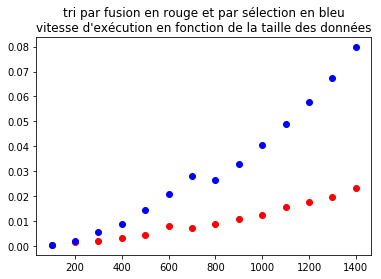

In [19]:
import matplotlib.pyplot as graph
graph.plot(tailles,yF,"ro")
graph.plot(tailles,yS,"bo")
graph.title("tri par fusion en rouge et par sélection en bleu\n"+
                 "vitesse d'exécution en fonction de la taille des données")
graph.show()

Les points ne sont pas bien alignés car l’exécution des programmes se fait dans un environnement multitâche. Il se peut donc que le système fasse autre chose pendant la partie chronométrée (comme enregistrer ou scanner un fichier avec l’antivirus) pour que la mesure soit faussée. Il suffit alors de relancer le programme pour avoir une nouveau version en espérant que seul le programme soit exécuté.

Pour la suite de l'exercice, on pourra chercher les équations de ces belles courbes (quadratiques).